In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

loading the data

In [4]:
data = pd.read_csv('iris.csv')

In [5]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

Removing the Id column

In [7]:
data = data.drop(['Id'], axis = 1)

In [8]:
data.shape

(150, 5)

In [9]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Dividing the data into test and train

In [10]:
train, test = train_test_split(data, test_size=0.10, random_state=42)

Plot of every feature against the whole dataset (train) to see if they follow the gaussian distribution

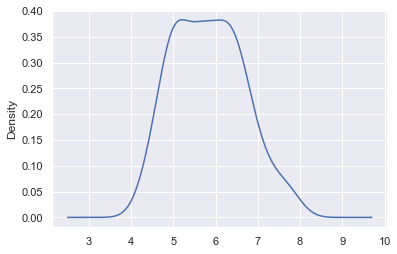

In [11]:
s = train['SepalLengthCm']
ax = s.plot.kde()

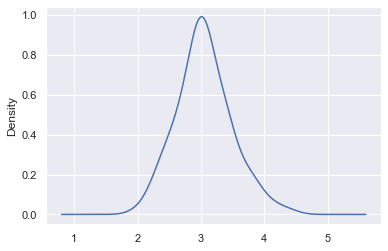

In [12]:
s = train['SepalWidthCm']
ax = s.plot.kde()

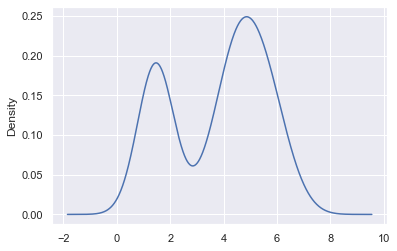

In [13]:
s = train['PetalLengthCm']
ax = s.plot.kde()

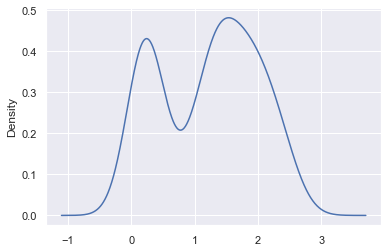

In [14]:
s = train['PetalWidthCm']
ax = s.plot.kde()

Encoding the labels 

In [15]:
le = preprocessing.LabelEncoder()
column = train['Species'].copy()
le.fit(column)
train_label = le.fit_transform(column)
test_label = le.fit_transform(test['Species'])
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Dropping the target column from test and train

In [16]:
train_features = train.drop(['Species'],axis = 1) 
test_features = test.drop(['Species'],axis = 1)

In [17]:
train_features.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

function to calculate mean and variance for a column

In [18]:
def mean_variance(col):
    value = col.values
    return value.mean(), value.var()

In [20]:
train['Species'].unique()

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

Getting the data for each label

In [21]:
versicolor = train[train['Species'] == 'Iris-versicolor']
virginica = train[train['Species'] == 'Iris-virginica']
setosa = train[train['Species'] == 'Iris-setosa']

Calculating mean and variance for each feature of data with class Iris-versicolor

In [22]:
mean_sepal_len_versicolor, var_sepal_len_versicolor = mean_variance(versicolor['SepalLengthCm'])
mean_sepal_wid_versicolor, var_sepal_wid_versicolor = mean_variance(versicolor['SepalWidthCm'])
mean_petal_len_versicolor, var_petal_len_versicolor = mean_variance(versicolor['PetalLengthCm'])
mean_petal_wid_versicolor, var_petal_wid_versicolor = mean_variance(versicolor['PetalWidthCm'])

Plots for every feature of class Iris-versicolor

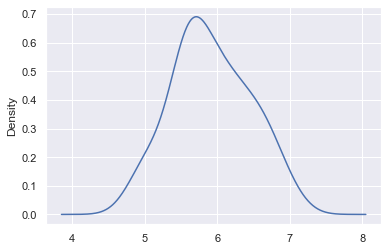

In [23]:
s = versicolor['SepalLengthCm']
ax = s.plot.kde()

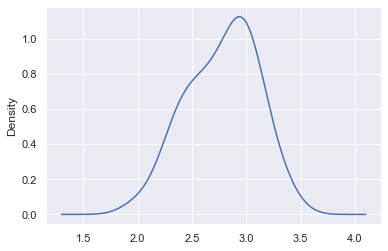

In [24]:
s = versicolor['SepalWidthCm']
ax = s.plot.kde()

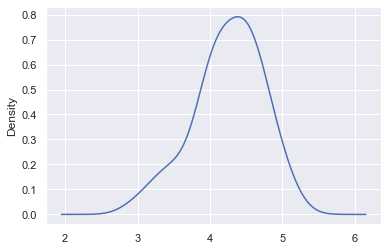

In [25]:
s = versicolor['PetalLengthCm']
ax = s.plot.kde()

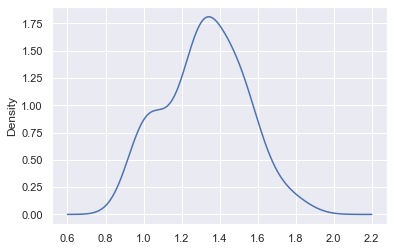

In [26]:
s = versicolor['PetalWidthCm']
ax = s.plot.kde()

Calculating mean and variance for each feature of data with class Iris-virginica

In [27]:
mean_sepal_len_virginica, var_sepal_len_virginica = mean_variance(virginica['SepalLengthCm'])
mean_sepal_wid_virginica, var_sepal_wid_virginica = mean_variance(virginica['SepalWidthCm'])
mean_petal_len_virginica, var_petal_len_virginica = mean_variance(virginica['PetalLengthCm'])
mean_petal_wid_virginica, var_petal_wid_virginica = mean_variance(virginica['PetalWidthCm'])

Plots for every feature of class Iris-virginica

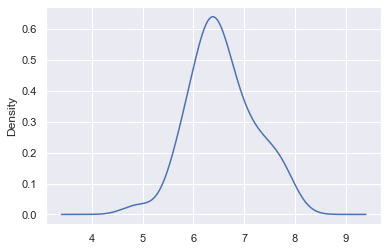

In [28]:
s = virginica['SepalLengthCm']
ax = s.plot.kde()

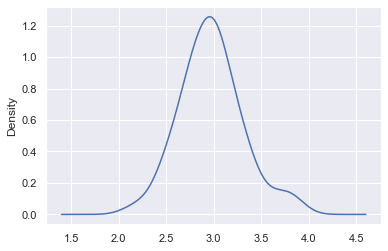

In [29]:
s = virginica['SepalWidthCm']
ax = s.plot.kde()

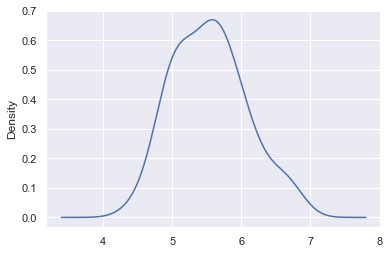

In [30]:
s = virginica['PetalLengthCm']
ax = s.plot.kde()

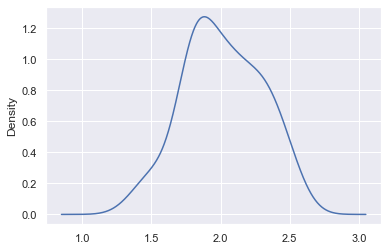

In [31]:
s = virginica['PetalWidthCm']
ax = s.plot.kde()

Calculating mean and variance for each feature of data with class Iris-setosa

In [32]:
mean_sepal_len_setosa, var_sepal_len_setosa = mean_variance(setosa['SepalLengthCm'])
mean_sepal_wid_setosa, var_sepal_wid_setosa = mean_variance(setosa['SepalWidthCm'])
mean_petal_len_setosa, var_petal_len_setosa = mean_variance(setosa['PetalLengthCm'])
mean_petal_wid_setosa, var_petal_wid_setosa = mean_variance(setosa['PetalWidthCm'])

Plots for every feature of class Iris-setosa

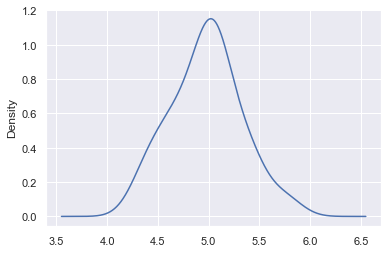

In [33]:
s = setosa['SepalLengthCm']
ax = s.plot.kde()

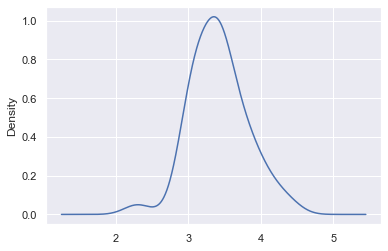

In [34]:
s = setosa['SepalWidthCm']
ax = s.plot.kde()

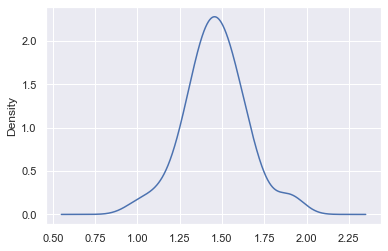

In [35]:
s = setosa['PetalLengthCm']
ax = s.plot.kde()

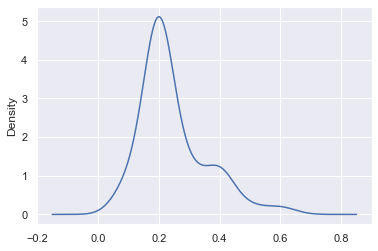

In [36]:
s = setosa['PetalWidthCm']
ax = s.plot.kde()

Calculating prior as number_of_datapoints_particular_class / total_datapoints from train data

In [37]:
prior_versicolor = len(versicolor) / len(train)
prior_virginica = len(virginica) / len(train)
prior_setosa = len(setosa) / len(train)

calculating likelihood

In [38]:
def likelihood(value, mean, var):
    p = 1/(np.sqrt(2*np.pi*var)) * np.exp((-(value-mean)**2)/(2*var))
    '''
    first = math.sqrt(2 * math.pi * var)
    first_inverse = 1 / first
    
    exp_deno = 2 * var
    exp_num = (value - mean) * (value - mean)
    exp_num = -exp_num
    
    to_exp = exp_num / exp_deno
    
    return first_inverse * math.exp(to_exp)
    '''
    return p

In [39]:
test_features.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

calculating the probability for every class when new data point comes
example ->
p(class = Iris-setosa | SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm) = numerator / denominator

numerator = p(Iris-setosa) * p(SepalLengthCm | Iris-setosa) * p(SepalWidthCm | Iris-setosa) * p(PetalLengthCm | Iris-setosa) * p(PetalWidthCm | Iris-setosa) 

denomenator = p(SepalLengthCm) *  P(SepalWidthCm) * p(PetalLengthCm) * p(PetalWidthCm)

i.e posterior probability = probability of likelihood of evidence * prior / probability of evidence

probability of evidence is not always tractable or not easy to find 
As the denominator is same for every class, it can  be ignored.

So, only focus on numerator

For every new data point the posterior probability is to be found for every class. 
The class having maximum probability is the class for the new data point

In [40]:
def cal_probability(on_data):
    max_indices = []
    for index, row in on_data.iterrows():
        max_list = []
        sepal_len = row['SepalLengthCm']
        sepal_wid = row['SepalWidthCm']
        petal_len = row['PetalLengthCm']
        petal_wid = row['PetalWidthCm']

        #setosa
        s_len = likelihood(sepal_len, mean_sepal_len_setosa, var_sepal_len_setosa)
        s_wid = likelihood(sepal_wid, mean_sepal_wid_setosa, var_sepal_wid_setosa)
        p_len = likelihood(petal_len, mean_petal_len_setosa, var_petal_len_setosa)
        p_wid = likelihood(petal_wid, mean_petal_wid_setosa, var_petal_wid_setosa)
        numerator_setosa = s_len * s_wid * p_len * p_wid * prior_setosa
        max_list.append(numerator_setosa)

        #versicolor
        s_len = likelihood(sepal_len, mean_sepal_len_versicolor, var_sepal_len_versicolor)
        s_wid = likelihood(sepal_wid, mean_sepal_wid_versicolor, var_sepal_wid_versicolor)
        p_len = likelihood(petal_len, mean_petal_len_versicolor, var_petal_len_versicolor)
        p_wid = likelihood(petal_wid, mean_petal_wid_versicolor, var_petal_wid_versicolor)
        numerator_versicolor = s_len * s_wid * p_len * p_wid * prior_versicolor 
        max_list.append(numerator_versicolor)

        #virginica
        s_len = likelihood(sepal_len, mean_sepal_len_virginica, var_sepal_len_virginica)
        s_wid = likelihood(sepal_wid, mean_sepal_wid_virginica, var_sepal_wid_virginica)
        p_len = likelihood(petal_len, mean_petal_len_virginica, var_petal_len_virginica)
        p_wid = likelihood(petal_wid, mean_petal_wid_virginica, var_petal_wid_virginica)
        numerator_virginica = s_len * s_wid * p_len * p_wid * prior_virginica
        max_list.append(numerator_virginica)

        max_value = max(max_list)
        max_index = max_list.index(max_value)
        max_indices.append(max_index)
    max_indices = np.array(max_indices)
    return max_indices

Calculate for test dataset

In [41]:
max_indices_test = cal_probability(test_features)

Calculate for train dataset

In [42]:
max_indices_train = cal_probability(train_features)

test accuracy

In [43]:
accuracy_score(max_indices_test, test_label)

1.0

train accuracy

In [44]:
accuracy_score(max_indices_train, train_label)

0.9555555555555556

test confusion matrix

[[6 0 0]
 [0 6 0]
 [0 0 3]]


Text(30.5, 0.5, 'Predicted')

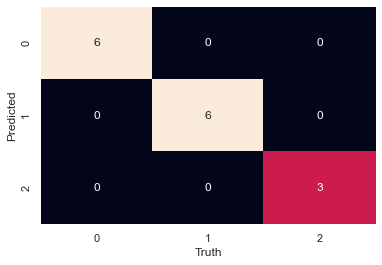

In [45]:
scratch_mat = confusion_matrix(max_indices_test, test_label)
print(scratch_mat)
sns.heatmap(scratch_mat, annot=True, cbar=False)
plt.xlabel('Truth')
plt.ylabel('Predicted')

train confusion  matrix

[[44  0  0]
 [ 0 41  3]
 [ 0  3 44]]


Text(30.5, 0.5, 'Predicted')

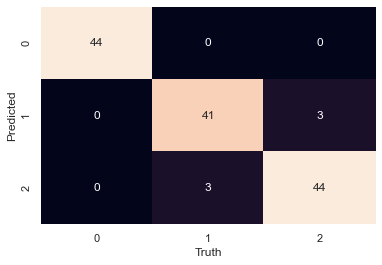

In [46]:
scratch_mat = confusion_matrix(max_indices_train, train_label)
print(scratch_mat)
sns.heatmap(scratch_mat, annot=True, cbar=False)
plt.xlabel('Truth')
plt.ylabel('Predicted')

With built in libraries

In [47]:
model = GaussianNB()

fit the model

In [48]:
model.fit(train_features, train_label)

GaussianNB()

for train set

In [49]:
train_pred = model.predict(train_features)

In [50]:
accuracy_score(train_pred, train_label)

0.9555555555555556

[[44  0  0]
 [ 0 41  3]
 [ 0  3 44]]


Text(89.18, 0.5, 'Predicted')

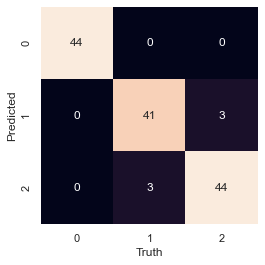

In [51]:
train_mat = confusion_matrix(train_pred, train_label)
print(train_mat)
names = np.unique(train_pred)
sns.heatmap(train_mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

for test set

In [52]:
test_pred = model.predict(test_features)

In [53]:
accuracy_score(test_pred, test_label)

1.0

[[6 0 0]
 [0 6 0]
 [0 0 3]]


Text(89.18, 0.5, 'Predicted')

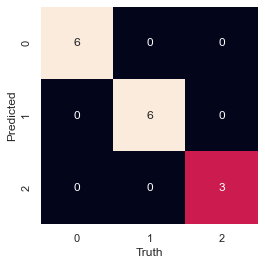

In [54]:
test_mat = confusion_matrix(test_pred, test_label)
print(test_mat)
names = np.unique(test_pred)
sns.heatmap(test_mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Same accuracy by both models